## 남방톱날꽃게(청게)의 나이 예측에 관한 데이터셋 가공 및 준비

kaggle에서 가져온 꽃게의 나이 예측(Physical attributes of Crabs found in Boston area - to predict age of Crab)에 관한 데이터를 다운로드 받아서 사용하였다. 꽃게의 경우, 데이터를 구하기 쉽지 않아, 여러 사이트에서 자료를 모아 병합하지는 못하였다.

출처는 다음과 같다.

Crab Age Prediction  
https://www.kaggle.com/sidhus/crab-age-prediction

### 1. 데이터셋 가공을 위해 필요한 라이브러리 import 하기
pandas 라이브러리 뿐만 아니라, 결측치를 확인하고 시각화하기 위해 missingno 라이브러리와 matplotlib 라이브러리를 import하였다.

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

### 2. 데이터셋 가져오기
상대경로를 사용하여 데이터셋을 가져온다.

In [2]:
# 남방톱날꽃게(green mud crab)에 관한 데이터셋
filepath = "./2_CrabAgePrediction.csv"

In [3]:
df = pd.read_csv(filepath)

In [4]:
df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


In [5]:
# 처음 6줄을 보기
df.head(6)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
5,F,1.5500,1.1625,0.3500,28.661344,13.579410,6.761356,7.229122,8


데이터의 모양 확인하기

In [6]:
df.shape

(3893, 9)

#### 데이터의 단위 확인
Sex: Male(M), Female(F) and Indeterminate(I)
Length: feet단위(1 foot = 30.48 cm)  
Diameter: feet단위  
Height: feet단위  
Weight: ounces단위(1 Pound = 16 ounces)  
Shucked Weight(Weight without the shell): ounces단위  
Viscera Weight(weight that wraps around your abdominal organs deep inside body): ounces단위  
Shell Weight(Weight of the Shell): ounces단위 
Age: months단위

### 3. 데이터 타입을 비롯한 데이터의 전반적인 정보를 확인하기

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


#### 데이터셋에 관한 설명을 가져오기(평균, 편차, 최솟값, 25%, 50%, 75%, 최댓값)

In [8]:
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


#### 데이터의 결측치를 확인하기

In [9]:
df.isna().sum() 

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

#### 데이터의 결측치를 시각화하기  
결측치가 없음을 시각적으로 확인할 수 있었다. 

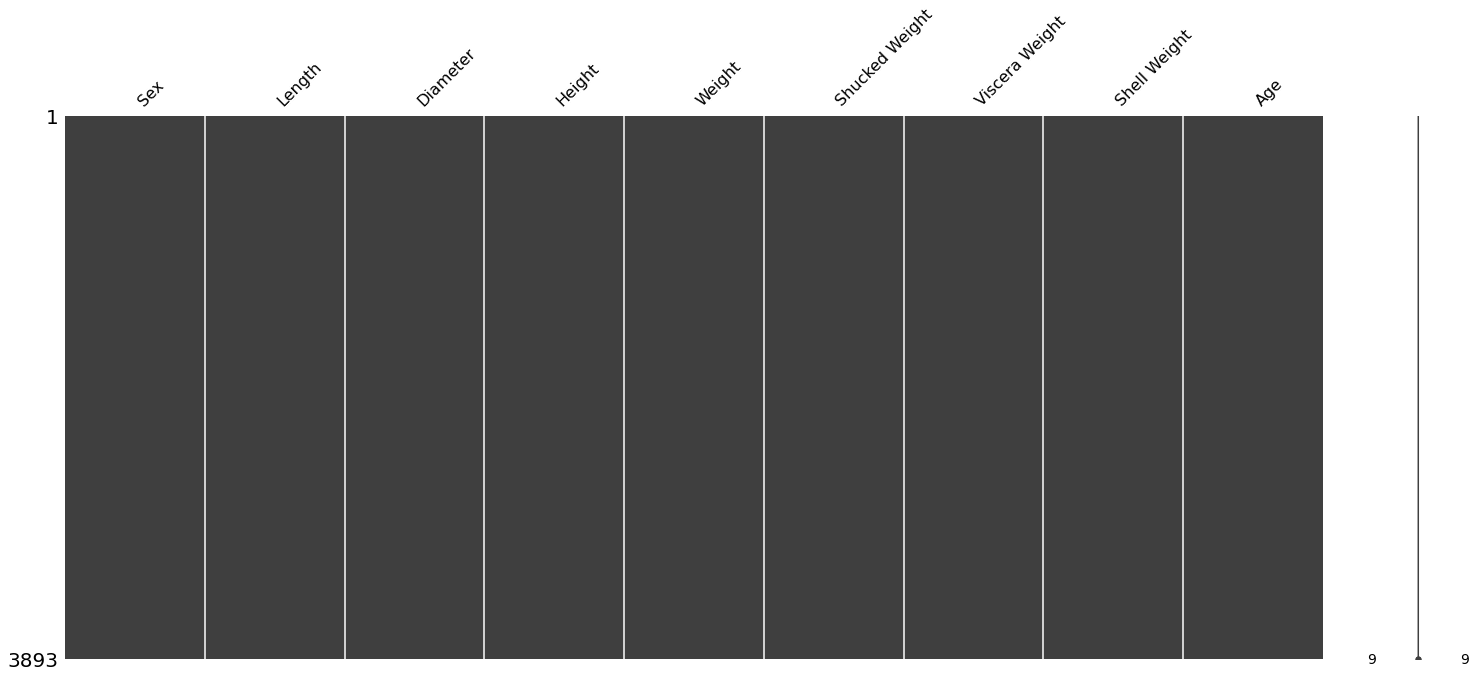

In [10]:
msno.matrix(df) # 결측치를 시각화
plt.show()

#### 남방톱날꽃게의 성별(M,F,I)에 따라 groupby함수를 통해 집계

집계 변수를 Weight로, 집계 대상을 성별로 잡았다. 

In [11]:
grouped = df['Weight'].groupby(df['Sex'])

grouped의 형태 확인: pandas의 SeriesGroupBy object 형태

In [12]:
grouped

그룹별 합계 : grouped.sum()

In [13]:
grouped.sum()

Sex
F    36338.219003
I    15092.919431
M    40316.263367
Name: Weight, dtype: float64

그룹별 평균 : grouped.mean()

In [14]:
grouped.mean()

Sex
F    29.663852
I    12.240811
M    28.094957
Name: Weight, dtype: float64

그룹별 크기 : grouped.size()

In [15]:
grouped.size()

Sex
F    1225
I    1233
M    1435
Name: Weight, dtype: int64

변수 하나가 아닌, 전체 연속형 변수에 대한 집계

In [16]:
df.groupby('Sex').mean()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
Sex,,,,,,,,
F,1.447367,1.136857,0.394990,29.663852,12.630952,6.537985,8.573271,11.139592
I,1.068309,0.815288,0.270114,12.240811,5.430021,2.611407,3.635944,7.883212
M,1.403946,1.098563,0.378537,28.094957,12.243240,6.109880,7.993621,10.723345


#### 중복된 데이터가 있는지 확인  
pandas의 duplicated()를 이용해 실수로 중복된 데이터가 들어가지는 않았는지 확인한다.  
중복된 데이터가 있는 경우 DataFrame.drop_duplicates()를 이용해 중복된 값을 제거해 준다.

In [17]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3888    False
3889    False
3890    False
3891    False
3892    False
Length: 3893, dtype: bool

중복된 행의 데이터를 모두 보여주기 

In [18]:
display(df[df.duplicated()])

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age


본 데이터 셋에는 중복된 데이터가 없음을 확인할 수 있다.

### 4. 데이터셋 가공  
주어진 데이터에는 결측치나 중복값이 존재하지는 않았다. 따라서 이에 대한 데이터셋 가공이 필요하지 않다. 하지만 추후 데이터 분석과 딥러닝 모델 설계를 위해 지나치게 평균에서 벗어난 이상치들을 제거해주면 좋을 것이다. 

#### 이상치(Outlier) 제거
평균에서 +/- 3표준편차를 넘어서는 값들을 이상치(Outlier)로 보는 3 시그마법을 이용해 이상치를 제거하였다. 

In [19]:
def is_outliers(s):
    upper_limit = s.mean() + (s.std()*3)
    lower_limit = s.mean() - (s.std()*3)
    return ~s.between(lower_limit, upper_limit)

꽃게는 시간이 지날 수록 몸무게가 늘어나기 때문에 weight가 꽃게의 나이 결정에 가장 중요하다고 생각한다. 따라서 나이별로 weight이상치를 제거하였다. 

In [20]:
df_out = df[~df.groupby('Age')['Weight'].apply(is_outliers)]

이상치 제거 전/후 비교

In [21]:
print("weight이상치 제거전:", df.shape)
print("weight이상치 제거후:", df_out.shape)

weight이상치 제거전: (3893, 9)
weight이상치 제거후: (3861, 9)


본 데이터 준비 단계의 이상치 제거가 불충분한지는 그래프를 통해 데이터를 시각화하는 다음 단계에서 확인해볼 수 있을 것이다.   

### 5. 가공된 데이터셋 저장

In [22]:
df_out.to_csv("2_Data preparation.csv",encoding="utf-8-sig",index=False)